In [1]:
import gzip
import json
import copy
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from collections import defaultdict
from string import punctuation

from PIL import ImageFont, ImageDraw
from PIL import Image as PImage

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

%matplotlib inline

In [2]:
# removed from the stopwords some words that might be useful
stopwords_set = (set(stopwords.words('english')) - set(['in', 'on', 'above', 'below', 'before', 'between',
                                        'both', 'down', 'each', 'few', 'from', 'further', 'into',
                                       'itself', 'more', 'off', 'only', 'own', 'under', 'or',
                                        'up', 'than', 'then', 'more', 'same', 'here', 'other',
                                        'against'])) | set(punctuation)
stemmer = PorterStemmer()

In [176]:
df_categories = pd.DataFrame.from_dict([{'id': 1, 'name': 'person', 'supercategory': 'person'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 {'id': 17, 'name': 'cat', 'supercategory': 'animal'},
 {'id': 18, 'name': 'dog', 'supercategory': 'animal'},
 {'id': 19, 'name': 'horse', 'supercategory': 'animal'},
 {'id': 20, 'name': 'sheep', 'supercategory': 'animal'},
 {'id': 21, 'name': 'cow', 'supercategory': 'animal'},
 {'id': 22, 'name': 'elephant', 'supercategory': 'animal'},
 {'id': 23, 'name': 'bear', 'supercategory': 'animal'},
 {'id': 24, 'name': 'zebra', 'supercategory': 'animal'},
 {'id': 25, 'name': 'giraffe', 'supercategory': 'animal'},
 {'id': 27, 'name': 'backpack', 'supercategory': 'accessory'},
 {'id': 28, 'name': 'umbrella', 'supercategory': 'accessory'},
 {'id': 31, 'name': 'handbag', 'supercategory': 'accessory'},
 {'id': 32, 'name': 'tie', 'supercategory': 'accessory'},
 {'id': 33, 'name': 'suitcase', 'supercategory': 'accessory'},
 {'id': 34, 'name': 'frisbee', 'supercategory': 'sports'},
 {'id': 35, 'name': 'skis', 'supercategory': 'sports'},
 {'id': 36, 'name': 'snowboard', 'supercategory': 'sports'},
 {'id': 37, 'name': 'sports ball', 'supercategory': 'sports'},
 {'id': 38, 'name': 'kite', 'supercategory': 'sports'},
 {'id': 39, 'name': 'baseball bat', 'supercategory': 'sports'},
 {'id': 40, 'name': 'baseball glove', 'supercategory': 'sports'},
 {'id': 41, 'name': 'skateboard', 'supercategory': 'sports'},
 {'id': 42, 'name': 'surfboard', 'supercategory': 'sports'},
 {'id': 43, 'name': 'tennis racket', 'supercategory': 'sports'},
 {'id': 44, 'name': 'bottle', 'supercategory': 'kitchen'},
 {'id': 46, 'name': 'wine glass', 'supercategory': 'kitchen'},
 {'id': 47, 'name': 'cup', 'supercategory': 'kitchen'},
 {'id': 48, 'name': 'fork', 'supercategory': 'kitchen'},
 {'id': 49, 'name': 'knife', 'supercategory': 'kitchen'},
 {'id': 50, 'name': 'spoon', 'supercategory': 'kitchen'},
 {'id': 51, 'name': 'bowl', 'supercategory': 'kitchen'},
 {'id': 52, 'name': 'banana', 'supercategory': 'food'},
 {'id': 53, 'name': 'apple', 'supercategory': 'food'},
 {'id': 54, 'name': 'sandwich', 'supercategory': 'food'},
 {'id': 55, 'name': 'orange', 'supercategory': 'food'},
 {'id': 56, 'name': 'broccoli', 'supercategory': 'food'},
 {'id': 57, 'name': 'carrot', 'supercategory': 'food'},
 {'id': 58, 'name': 'hot dog', 'supercategory': 'food'},
 {'id': 59, 'name': 'pizza', 'supercategory': 'food'},
 {'id': 60, 'name': 'donut', 'supercategory': 'food'},
 {'id': 61, 'name': 'cake', 'supercategory': 'food'},
 {'id': 62, 'name': 'chair', 'supercategory': 'furniture'},
 {'id': 63, 'name': 'couch', 'supercategory': 'furniture'},
 {'id': 64, 'name': 'potted plant', 'supercategory': 'furniture'},
 {'id': 65, 'name': 'bed', 'supercategory': 'furniture'},
 {'id': 67, 'name': 'dining table', 'supercategory': 'furniture'},
 {'id': 70, 'name': 'toilet', 'supercategory': 'furniture'},
 {'id': 72, 'name': 'tv', 'supercategory': 'electronic'},
 {'id': 73, 'name': 'laptop', 'supercategory': 'electronic'},
 {'id': 74, 'name': 'mouse', 'supercategory': 'electronic'},
 {'id': 75, 'name': 'remote', 'supercategory': 'electronic'},
 {'id': 76, 'name': 'keyboard', 'supercategory': 'electronic'},
 {'id': 77, 'name': 'cell phone', 'supercategory': 'electronic'},
 {'id': 78, 'name': 'microwave', 'supercategory': 'appliance'},
 {'id': 79, 'name': 'oven', 'supercategory': 'appliance'},
 {'id': 80, 'name': 'toaster', 'supercategory': 'appliance'},
 {'id': 81, 'name': 'sink', 'supercategory': 'appliance'},
 {'id': 82, 'name': 'refrigerator', 'supercategory': 'appliance'},
 {'id': 84, 'name': 'book', 'supercategory': 'indoor'},
 {'id': 85, 'name': 'clock', 'supercategory': 'indoor'},
 {'id': 86, 'name': 'vase', 'supercategory': 'indoor'},
 {'id': 87, 'name': 'scissors', 'supercategory': 'indoor'},
 {'id': 88, 'name': 'teddy bear', 'supercategory': 'indoor'},
 {'id': 89, 'name': 'hair drier', 'supercategory': 'indoor'},
 {'id': 90, 'name': 'toothbrush', 'supercategory': 'indoor'}])

In [117]:
%%time
# build dataset without preprocessing
file = '../../data/guesswhat.train.jsonl.gz'
games = defaultdict(list)
with gzip.open(file) as f:
    for i, line in enumerate(f):
        if i > 10:
            break
        categories = defaultdict(list)
        line = line.decode("utf-8")
        jsonline = json.loads(line.strip('\n'))
        status = jsonline['status']
        game_id = jsonline['id']
        for v in jsonline['objects']:
            category = v['category']
            categories['category'].append(category)
            category_id = v['category_id']
            categories['category_id'].append(category_id)
            supercategory = df_categories[df_categories.id == category_id].name.iloc[0]
            categories['supercategory'].append(supercategory)
            if v['id'] == jsonline['object_id']:
                target_category = v['category']
                target_category_id = v['category_id']
                target_supercategory = df_categories[df_categories.id == target_category_id].name.iloc[0]
                target_supercategory_id = df_categories[df_categories.id == target_category_id].name.index.values[0]
        categories = str(dict(categories))
        for v in jsonline['qas']:
            question = str.lower(v['question'])
            answer = str.lower(v['answer'])
            qas_id = v['id']
            games['game_id'].append(game_id)
            games['question'].append(question)
            games['answer'].append(answer)
            games['question_id'].append(qas_id)
            games['target_category'].append(target_category)
            games['target_category_id'].append(target_category_id)
            games['target_supercategory'].append(target_supercategory)
            games['target_supercategory_id'].append(target_supercategory_id)
            games['categories'] = categories


CPU times: user 66.2 ms, sys: 0 ns, total: 66.2 ms
Wall time: 66.2 ms


In [6]:
%%time
df = pd.DataFrame.from_dict(games)
df = df[['game_id', 'question', 'question_id', 'answer', 'target_category', 
        'target_category_id', 'target_supercategory',
        'target_supercategory_id', 'categories']]
# df.columns

CPU times: user 636 ms, sys: 44 ms, total: 680 ms
Wall time: 679 ms


In [7]:
df.head()

,game_id,question,question_id,answer,target_category,target_category_id,target_supercategory,target_supercategory_id,categories
0,2416,Is it a person?,4967,Yes,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
1,2416,Is the person a boy?,4969,Yes,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
2,2417,is it a person?,4968,Yes,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
3,2417,in the foreground?,4971,Yes,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
4,2421,is it furniture?,4973,No,bowl,51,bowl,45,"{'category': ['car', 'car', 'car', 'car', 'car..."


In [ ]:
# df.groupby('game_id').first().question[df.groupby('game_id').first().question.str.contains('hello')]

In [104]:
df[df.question.str.contains('hello')].question

4049                                        how about gray?
6951                                 how about green boots?
10237                                   how about the cake?
12959                          is the item about to be hit?
14817     i may not see the full picture, so i will ask ...
16382     does it look like a psycho about to hit an ele...
16730     how about the one with the blue shirt next to ...
19607     i asked about every kid behind the skater in g...
20888                                    how about wearing?
21245                             how about the white wall?
21249                                   how about the bear?
22334                  is it about to fall off the counter?
24677     is it left of the book with the spine that is ...
25313     is it the black car about to pass under the br...
25890                            how about the next row up?
28144                                        how about red?
29155                                   

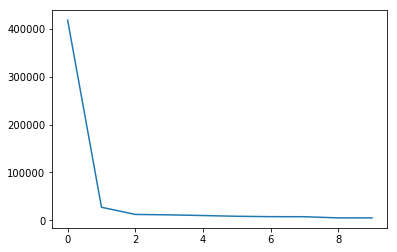

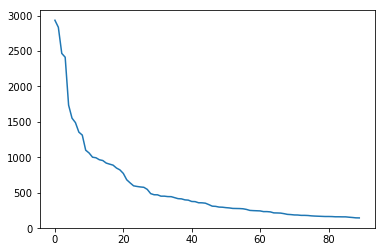

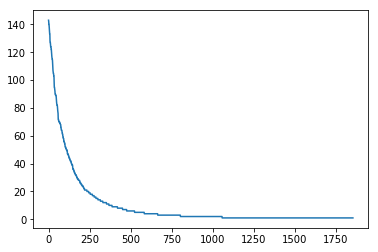

is            418348
the            27013
are            11985
a              11093
does            9687
in              8128
it              7337
on              7187
one             4774
can             4699
do              2935
person          2836
left            2467
i               2413
right           1737
with            1553
wearing         1490
white           1356
near            1314
all             1101
to              1061
first           1002
                 994
black            966
2nd              955
so               919
red              904
something        890
middle           849
next             823
               ...  
lot                1
icing              1
mixer              1
separated          1
454                1
contains           1
closet             1
dimly              1
pelican            1
chips              1
ron                1
children           1
pig                1
ho                 1
violet             1
windows            1
urinal       

In [77]:
# df.question.str.split(' ').get(0)
# plotting a histogram of occurrences of questions (how many times a question occurs)
# splitted in 3 the histogram since the values are very different in ranges
plt.plot(df.question.str.extract('([0-9a-zA-Z]*) ', expand=False).value_counts()[:10].values)
plt.show()

plt.plot(df.question.str.extract('([0-9a-zA-Z]*) ', expand=False).value_counts()[10:100].values)
plt.show()

plt.plot(df.question.str.extract('([0-9a-zA-Z]*) ', expand=False).value_counts()[100:].values)
plt.show()

In [80]:
df.question.str.extract('([0-9a-zA-Z]*) ', expand=False).value_counts()

is            418348
the            27013
are            11985
a              11093
does            9687
in              8128
it              7337
on              7187
one             4774
can             4699
do              2935
person          2836
left            2467
i               2413
right           1737
with            1553
wearing         1490
white           1356
near            1314
all             1101
to              1061
first           1002
                 994
black            966
2nd              955
so               919
red              904
something        890
middle           849
next             823
               ...  
lot                1
icing              1
mixer              1
separated          1
454                1
contains           1
closet             1
dimly              1
pelican            1
chips              1
ron                1
children           1
pig                1
ho                 1
violet             1
windows            1
urinal       

In [89]:
df.question[df.question.str.extract('([0-9a-zA-Z]*) ', expand=False) == 'do']

109                                    do people sit on it?
286                   do you rest your head on it at night?
335                         do they have black clothing on?
411                    do you use this object to keep warm?
422                               do people lay down on it?
467                             do you your hand to use it?
497                            do you wear it on your head?
498                            do you wear it on your feet?
684                             do they have short sleeves?
761           do they have their arm around another person?
893                            do they have yellow on them?
1141                       do we see all four wheels of it?
1164                            do they have a blue helmet?
1324                                      do you sit on it?
1465                                      do you sit on it?
1483                                      do you eat on it?
1717                                    

In [60]:
df.question[~df.question.str.contains('is|it|are is|it|there')]

3                                   in the foreground?
15                  does the container have a picture?
16                  does the container have a red top?
59                                hanging on the wall?
61                                located in a corner?
83                               are they wearing red?
84                       are they wearing a black hat?
85                              are they in the front?
88                                  are they far away?
224                             person place or thing?
310                        are they in the foreground?
311                             are they wearing blue?
335                    do they have black clothing on?
336             are they touching an orange surfboard?
369                         are they in the back left?
384                          are they on a skateboard?
419                        are they in the foreground?
442                              are they wearing red?
455       

In [53]:
df.iloc[305738].question

'is it being held by someone underneath the hello kitty umbrella?'

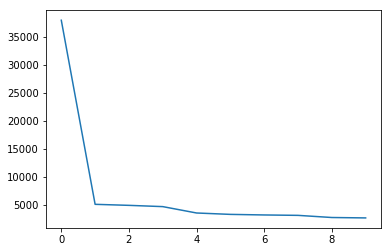

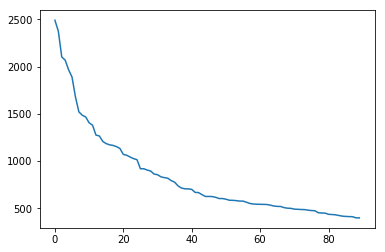

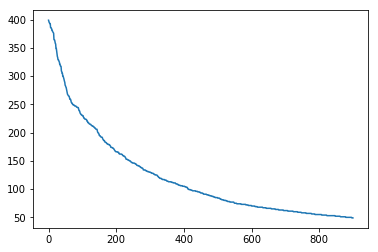

(205548,)

In [44]:
# plotting a histogram of occurrences of questions (how many times a question occurs)
# splitted in 3 the histogram since the values are very different in ranges
plt.plot(df.question.value_counts().values[:10])
plt.show()
plt.plot(df.question.value_counts().values[10:100])
plt.show()
plt.plot(df.question.value_counts().values[100:1000])
plt.show()
df.question.value_counts().values.shape
# 10: 2500
# 100: 400

In [45]:
df.shape

(579633, 9)

In [128]:
%%time
# building the dataframe with preprocessing
file = '../../data/guesswhat.train.jsonl.gz'
games = defaultdict(list)
with gzip.open(file) as f:
    for i, line in enumerate(f):
        categories = defaultdict(list)
        line = line.decode("utf-8")
        jsonline = json.loads(line.strip('\n'))
        status = jsonline['status']
        game_id = jsonline['id']
        for v in jsonline['objects']:
            category =  ' '.join([stemmer.stem(w) 
                                 for w in word_tokenize(str.lower(v['category'])) 
                                 if not w in stopwords_set])
            categories['category'].append(category)
            category_id = v['category_id']
            categories['category_id'].append(category_id)
            supercategory = stemmer.stem(df_categories[df_categories.id == category_id].supercategory.iloc[0])
            categories['supercategory'].append(supercategory)
            if v['id'] == jsonline['object_id']:
                target_category = category
                target_category_id = category_id
                target_supercategory = supercategory
        categories = str(dict(categories))
        for v in jsonline['qas']:
            question = ' '.join([stemmer.stem(w) 
                                 for w in word_tokenize(str.lower(v['question'])) 
                                 if not w in stopwords_set])
            answer = str.lower(v['answer'])
            qas_id = v['id']
            games['status'].append(status)
            games['game_id'].append(game_id)
            games['question'].append(question)
            games['answer'].append(answer)
            games['question_id'].append(qas_id)
            games['target_category'].append(target_category)
            games['target_category_id'].append(target_category_id)
            games['target_supercategory'].append(target_supercategory)
            games['categories'].append(categories)

CPU times: user 11min 58s, sys: 428 ms, total: 11min 58s
Wall time: 11min 58s


In [130]:
%%time
df = pd.DataFrame.from_dict(games)
df = df[['game_id', 'question', 'question_id', 'answer', 'target_category', 
        'target_category_id', 'target_supercategory', 'categories']]
# df.columns

CPU times: user 579 ms, sys: 0 ns, total: 579 ms
Wall time: 578 ms


In [177]:
df_categories.name = df_categories.name.apply(lambda x: ' '.join([stemmer.stem(w) 
                                 for w in word_tokenize(str.lower(x)) 
                                 if not w in stopwords_set]))
df_categories.supercategory = df_categories.supercategory.apply(lambda x: stemmer.stem(x))

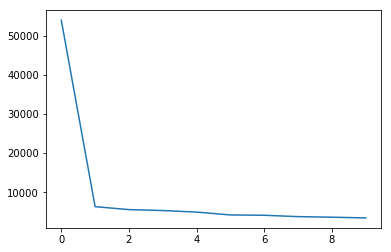

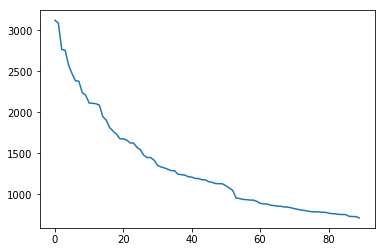

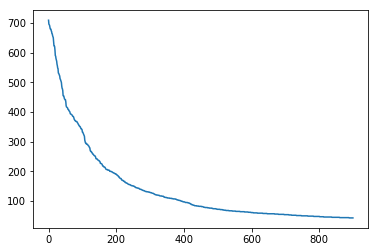

(147607,)

In [135]:
# plotting a histogram of occurrences of questions (how many times a question occurs)
# splitted in 3 the histogram since the values are very different in ranges
plt.plot(df.question.value_counts().values[:10])
plt.show()
plt.plot(df.question.value_counts().values[10:100])
plt.show()
plt.plot(df.question.value_counts().values[100:1000])
plt.show()
df.question.value_counts().values.shape
# 10: 2500
# 100: 400

In [136]:
df.question.value_counts()

person                                        54012
food                                           6300
car                                            5539
white                                          5306
chair                                          4906
vehicl                                         4176
tabl                                           4091
human                                          3746
red                                            3599
anim                                           3415
black                                          3123
on left                                        3089
on tabl                                        2766
green                                          2757
in front                                       2574
bottl                                          2473
book                                           2385
blue                                           2379
in left                                        2240
in backgroun

In [137]:
# number of games (and questions, etc..) played for every category
# shall we also plot the number of objects per image with mean and deviation?
df.groupby('target_category').nunique().sort_values(by='game_id', ascending=False)

,game_id,question,question_id,answer,target_category,target_category_id,target_supercategory,categories
target_category,,,,,,,,
person,33647,46704,152201,3,1,1,1,15924
car,5617,10296,31083,3,1,1,1,3240
chair,3843,7954,23061,3,1,1,1,2637
bottl,2791,7128,18422,3,1,1,1,1798
book,2739,8842,23368,3,1,1,1,1569
cup,2372,5331,14723,3,1,1,1,1792
dine tabl,2255,3766,13389,3,1,1,1,1783
bowl,1798,4655,11790,3,1,1,1,1331
boat,1570,3576,8231,3,1,1,1,636


In [202]:
# number of questions that appear on x targets (e.g, there are 131200 questions that appear with just one only target.
# 193 questions appear in different games, for a total of 10 target categories)
df.groupby('question').nunique().sort_values(by='game_id', ascending=False).target_category.value_counts()

1     131200
2       7818
3       2849
4       1449
5        884
6        586
7        431
8        321
9        260
10       193
11       172
12       158
13       114
14        90
15        77
16        74
17        71
18        62
19        53
20        43
22        41
26        41
23        40
21        36
25        36
27        33
24        25
30        23
28        22
32        20
       ...  
48         9
47         8
43         7
50         7
65         6
70         6
58         6
54         6
53         6
76         6
61         6
59         6
79         5
60         5
56         5
57         4
55         4
51         4
63         3
68         3
71         3
74         3
77         3
78         3
64         2
67         2
69         2
62         2
75         2
80         1
Name: target_category, Length: 78, dtype: int64

In [203]:
# here we show instead for how many taargets a question appears
df.groupby('question').nunique().sort_values(by='game_id', ascending=False).target_category

question
person                                                 80
food                                                   59
car                                                    70
white                                                  79
chair                                                  70
vehicl                                                 61
tabl                                                   68
human                                                  79
red                                                    77
anim                                                   72
black                                                  78
on left                                                79
on tabl                                                57
green                                                  76
in front                                               78
bottl                                                  60
blue                                                   74
book 

In [144]:
# select only the rows for which the target categeory name is contained in the question
matching_cat_df = df[df.apply(lambda row: row['target_category'] in row['question'], axis=1)]

In [145]:
matching_cat_df

,game_id,question,question_id,answer,target_category,target_category_id,target_supercategory,categories
0,2416,person,4967,yes,person,1,person,"{'category': ['person', 'person', 'backpack', ..."
1,2416,person boy,4969,yes,person,1,person,"{'category': ['person', 'person', 'backpack', ..."
2,2417,person,4968,yes,person,1,person,"{'category': ['chair', 'person', 'hot dog', 'c..."
23,2440,person,5027,yes,person,1,person,"{'category': ['surfboard', 'surfboard', 'perso..."
24,2440,person male,5036,no,person,1,person,"{'category': ['surfboard', 'surfboard', 'perso..."
30,2443,in bottl,5091,yes,bottl,44,kitchen,"{'category': ['person', 'bottl', 'bottl', 'bot..."
77,2466,basebal glove,5355,yes,basebal glove,40,sport,"{'category': ['basebal glove', 'person', 'pers..."
81,2470,person,5125,yes,person,1,person,"{'category': ['person', 'person', 'person', 'e..."
87,2472,person,5148,yes,person,1,person,"{'category': ['umbrella', 'person', 'person', ..."
97,2474,motorcycl,5166,yes,motorcycl,4,vehicl,"{'category': ['motorcycl', 'person', 'person',..."


In [146]:
matching_cat_df[matching_cat_df.question.str.contains(' or ')]

,game_id,question,question_id,answer,target_category,target_category_id,target_supercategory,categories
937,3058,person wear yellow or red or sky blue,7373,no,person,1,person,"{'category': ['person', 'person', 'snowboard',..."
2890,4305,onli one book or mani togeth,12461,n/a,book,84,indoor,"{'category': ['book', 'book', 'book', 'book', ..."
8332,7976,trash bu or contain,25961,no,bu,6,vehicl,"{'category': ['bu', 'bu', 'bu', 'bu', 'person'..."
9048,8664,whole person or part say ye whole person part,28212,yes,person,1,person,"{'category': ['person', 'snowboard', 'person',..."
9257,8924,whole person or part him..answ ye whole..no part,28951,yes,person,1,person,"{'category': ['person', 'ski', 'backpack'], 'c..."
9527,9091,train or train car,29535,no,car,3,vehicl,"{'category': ['train', 'car', 'car', 'car', 't..."
9535,9091,car or car in lot,29586,yes,car,3,vehicl,"{'category': ['train', 'car', 'car', 'car', 't..."
9637,9140,couch or bed,29741,yes,couch,63,furnitur,"{'category': ['book', 'tie', 'book', 'book', '..."
10990,9809,from left right or farthest from us closest 1 ...,33042,no,chair,62,furnitur,"{'category': ['chair', 'chair', 'chair', 'chai..."
11564,10111,near sink or sink,34051,yes,sink,81,applianc,"{'category': ['bottl', 'dine tabl', 'bottl', '..."


In [147]:
# select only the rows for which the supercategeory name is contained in the question
matching_supercat_df = df[df.apply(lambda row: row['target_supercategory'] in row['question'], axis=1)]

In [150]:
# select only the rows for which the supercategeory name is contained in the question or the category name is
matching_all_df = df[df.apply(lambda row: row['target_category'] in row['question'] or 
                              row['target_supercategory'] in row['question'], axis=1)]

In [180]:
%%time
temp_cat_mask = df.question.str.contains(df_categories['name'].iloc[0])
temp_cat_count = temp_cat_mask.astype(int)
temp_sup_mask = df.question.str.contains(df_categories.supercategory.iloc[0])
temp_sup_count = temp_sup_mask.astype(int)
for i, row in df_categories.iterrows():
        category = row['name']
        supercategory = row.supercategory
        print(i, category, supercategory)
        temp_cat_mask = df.question.str.contains(category) | temp_cat_mask
        temp_sup_mask = df.question.str.contains(supercategory) | temp_sup_mask
        if i > 0:
            temp_cat_count = temp_cat_count.add( df.question.str.contains(category).astype(int))
            temp_sup_count = temp_sup_count.add( df.question.str.contains(supercategory).astype(int))
# for question in df.question.iterrows():
    
# matching_df = df.apply(lambda row: sum([1 if len(df_categories[df_categories.name.str.contains(word)]) > 0 else 0
#                                            for word in row['question'].split(' ')]), axis=1)

0 person person
1 bicycl vehicl
2 car vehicl
3 motorcycl vehicl
4 airplan vehicl
5 bu vehicl
6 train vehicl
7 truck vehicl
8 boat vehicl
9 traffic light outdoor
10 fire hydrant outdoor
11 stop sign outdoor
12 park meter outdoor
13 bench outdoor
14 bird anim
15 cat anim
16 dog anim
17 hors anim
18 sheep anim
19 cow anim
20 eleph anim
21 bear anim
22 zebra anim
23 giraff anim
24 backpack accessori
25 umbrella accessori
26 handbag accessori
27 tie accessori
28 suitcas accessori
29 frisbe sport
30 ski sport
31 snowboard sport
32 sport ball sport
33 kite sport
34 basebal bat sport
35 basebal glove sport
36 skateboard sport
37 surfboard sport
38 tenni racket sport
39 bottl kitchen
40 wine glass kitchen
41 cup kitchen
42 fork kitchen
43 knife kitchen
44 spoon kitchen
45 bowl kitchen
46 banana food
47 appl food
48 sandwich food
49 orang food
50 broccoli food
51 carrot food
52 hot dog food
53 pizza food
54 donut food
55 cake food
56 chair furnitur
57 couch furnitur
58 pot plant furnitur
59 bed 

In [181]:
df[temp_cat_mask]

,game_id,question,question_id,answer,target_category,target_category_id,target_supercategory,categories
0,2416,person,4967,yes,person,1,person,"{'category': ['person', 'person', 'backpack', ..."
1,2416,person boy,4969,yes,person,1,person,"{'category': ['person', 'person', 'backpack', ..."
2,2417,person,4968,yes,person,1,person,"{'category': ['chair', 'person', 'hot dog', 'c..."
12,2426,applianc,4977,no,bottl,44,kitchen,"{'category': ['bottl', 'sink', 'oven', 'bowl',..."
18,2426,on spice carousel,5018,yes,bottl,44,kitchen,"{'category': ['bottl', 'sink', 'oven', 'bowl',..."
23,2440,person,5027,yes,person,1,person,"{'category': ['surfboard', 'surfboard', 'perso..."
24,2440,person male,5036,no,person,1,person,"{'category': ['surfboard', 'surfboard', 'perso..."
25,2443,person,5032,no,bottl,44,kitchen,"{'category': ['person', 'bottl', 'bottl', 'bot..."
26,2443,applianc,5046,no,bottl,44,kitchen,"{'category': ['person', 'bottl', 'bottl', 'bot..."
29,2443,in carton,5077,no,bottl,44,kitchen,"{'category': ['person', 'bottl', 'bottl', 'bot..."


In [194]:
df[temp_cat_mask | temp_sup_mask]

,game_id,question,question_id,answer,target_category,target_category_id,target_supercategory,categories
0,2416,person,4967,yes,person,1,person,"{'category': ['person', 'person', 'backpack', ..."
1,2416,person boy,4969,yes,person,1,person,"{'category': ['person', 'person', 'backpack', ..."
2,2417,person,4968,yes,person,1,person,"{'category': ['chair', 'person', 'hot dog', 'c..."
4,2421,furnitur,4973,no,bowl,51,kitchen,"{'category': ['sink', 'dine tabl', 'chair', 'c..."
12,2426,applianc,4977,no,bottl,44,kitchen,"{'category': ['bottl', 'sink', 'oven', 'bowl',..."
18,2426,on spice carousel,5018,yes,bottl,44,kitchen,"{'category': ['bottl', 'sink', 'oven', 'bowl',..."
19,2435,food,5023,yes,banana,52,food,"{'category': ['banana', 'orang', 'orang', 'bow..."
23,2440,person,5027,yes,person,1,person,"{'category': ['surfboard', 'surfboard', 'perso..."
24,2440,person male,5036,no,person,1,person,"{'category': ['surfboard', 'surfboard', 'perso..."
25,2443,person,5032,no,bottl,44,kitchen,"{'category': ['person', 'bottl', 'bottl', 'bot..."


In [195]:
# percentage of questions that contain either the target category or the super category
df[temp_cat_mask | temp_sup_mask].shape[0]/df.shape[0]

0.3992957612834328

In [200]:
df[temp_cat_count == 3]

,game_id,question,question_id,answer,target_category,target_category_id,target_supercategory,categories
9681,9182,pizza clock hour would broccoli,29925,n/a,broccoli,56,food,"{'category': ['broccoli', 'bowl', 'broccoli', ..."
9756,9238,person carri surfboard,30172,no,person,1,person,"{'category': ['surfboard', 'backpack', 'surfbo..."
21970,19276,person carri blue backpack,62256,no,person,1,person,"{'category': ['person', 'backpack', 'person', ..."
22792,20078,bowl contain carrot,64465,yes,carrot,57,food,"{'category': ['carrot', 'dog', 'carrot', 'bowl..."
23537,20396,person carri white surfboard wear blue trunk,65796,no,person,1,person,"{'category': ['person', 'person', 'person', 'b..."
27733,22202,cat hold carrot,73874,no,carrot,57,food,"{'category': ['carrot', 'cat', 'carrot'], 'cat..."
32691,25169,person number 287 carri ski,84784,no,ski,35,sport,"{'category': ['ski', 'person', 'person', 'pers..."
32692,25169,person number 271 carri ski,84807,yes,ski,35,sport,"{'category': ['ski', 'person', 'person', 'pers..."
36159,27135,person in car closest giraff,92280,no,person,1,person,"{'category': ['car', 'person', 'person', 'pers..."
40060,28995,butter knife across spoon,99948,yes,knife,49,kitchen,"{'category': ['knife', 'fork', 'cup', 'knife',..."


In [197]:
df[temp_cat_mask | temp_sup_mask][temp_cat_count == 3]

/home/hiryugan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,game_id,question,question_id,answer,target_category,target_category_id,target_supercategory,categories
9681,9182,pizza clock hour would broccoli,29925,n/a,broccoli,56,food,"{'category': ['broccoli', 'bowl', 'broccoli', ..."
9756,9238,person carri surfboard,30172,no,person,1,person,"{'category': ['surfboard', 'backpack', 'surfbo..."
21970,19276,person carri blue backpack,62256,no,person,1,person,"{'category': ['person', 'backpack', 'person', ..."
22792,20078,bowl contain carrot,64465,yes,carrot,57,food,"{'category': ['carrot', 'dog', 'carrot', 'bowl..."
23537,20396,person carri white surfboard wear blue trunk,65796,no,person,1,person,"{'category': ['person', 'person', 'person', 'b..."
27733,22202,cat hold carrot,73874,no,carrot,57,food,"{'category': ['carrot', 'cat', 'carrot'], 'cat..."
32691,25169,person number 287 carri ski,84784,no,ski,35,sport,"{'category': ['ski', 'person', 'person', 'pers..."
32692,25169,person number 271 carri ski,84807,yes,ski,35,sport,"{'category': ['ski', 'person', 'person', 'pers..."
36159,27135,person in car closest giraff,92280,no,person,1,person,"{'category': ['car', 'person', 'person', 'pers..."
40060,28995,butter knife across spoon,99948,yes,knife,49,kitchen,"{'category': ['knife', 'fork', 'cup', 'knife',..."


In [186]:
# number of categories per questions (270 questions have 3 categories mentioned)
temp_cat_count.value_counts()

0    370517
1    201401
2      7444
3       270
4         1
Name: question, dtype: int64

In [189]:
# same for super categories, but contains redundant values thus it is wrong. 
temp_sup_count.value_counts()

0     477630
1      78556
10     13127
8       5504
6       3630
5        640
7        350
9         78
11        70
12        44
15         2
18         1
13         1
Name: question, dtype: int64

In [192]:
# 
temp_sup_count.sort_values(ascending=False)

60477     18
392803    15
12737     15
449220    13
154395    12
524328    12
240516    12
242715    12
572009    12
524850    12
330545    12
251448    12
241623    12
140461    12
437369    12
49835     12
538558    12
43857     12
494500    12
212613    12
297019    12
156047    12
464169    12
464174    12
205720    12
101365    12
391922    12
251751    12
267430    12
361681    12
          ..
368081     0
368063     0
368064     0
368065     0
368066     0
368067     0
368068     0
368069     0
368070     0
368071     0
368073     0
368074     0
368075     0
368076     0
368082     0
368100     0
368083     0
368085     0
368087     0
368088     0
368089     0
368090     0
368091     0
368093     0
368094     0
368095     0
368096     0
368097     0
368099     0
289816     0
Name: question, Length: 579633, dtype: int64

In [193]:
df.iloc[60477]

game_id                                                             36759
question                                                 transport vehicl
question_id                                                        136571
answer                                                                yes
target_category                                                   airplan
target_category_id                                                      5
target_supercategory                                               vehicl
categories              {'category': ['person', 'airplan', 'person', '...
Name: 60477, dtype: object

In [ ]:
%%time
# select only the rows for which the supercategeory name is contained in the question
matching_sup_df = df.apply(lambda row: sum([1 if len(df_categories[df_categories.supercategory == word]) > 0 else 0
                                           for word in row['question'].split(' ')]), axis=1)

In [126]:
df[matching_df.apply(lambda x: True if x else False)]

,game_id,question,question_id,answer,target_category,target_category_id,target_supercategory,target_supercategory_id,categories
0,2416,person,4967,yes,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
1,2416,person boy,4969,yes,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
2,2417,person,4968,yes,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
23,2440,person,5027,yes,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
24,2440,person male,5036,no,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
25,2443,person,5032,no,bottl,44,bottle,39,"{'category': ['car', 'car', 'car', 'car', 'car..."
47,2458,knife,5092,no,bowl,51,bowl,45,"{'category': ['car', 'car', 'car', 'car', 'car..."
62,2466,person,5120,no,baseball glov,40,baseball glove,35,"{'category': ['car', 'car', 'car', 'car', 'car..."
81,2470,person,5125,yes,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
87,2472,person,5148,yes,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."


In [123]:
# percentage of questions in which the supercategory appears
df[matching_sup_df.apply(lambda x: True if x else False)].shape[0]/df.shape[0]

0.15050212807069302

In [125]:
df[matching_sup_df.apply(lambda x: True if x else False) | matching_df.apply(lambda x: True if x else False)]

,game_id,question,question_id,answer,target_category,target_category_id,target_supercategory,target_supercategory_id,categories
0,2416,person,4967,yes,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
1,2416,person boy,4969,yes,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
2,2417,person,4968,yes,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
19,2435,food,5023,yes,banana,52,banana,46,"{'category': ['car', 'car', 'car', 'car', 'car..."
23,2440,person,5027,yes,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
24,2440,person male,5036,no,person,1,person,0,"{'category': ['car', 'car', 'car', 'car', 'car..."
25,2443,person,5032,no,bottl,44,bottle,39,"{'category': ['car', 'car', 'car', 'car', 'car..."
27,2443,food,5053,yes,bottl,44,bottle,39,"{'category': ['car', 'car', 'car', 'car', 'car..."
47,2458,knife,5092,no,bowl,51,bowl,45,"{'category': ['car', 'car', 'car', 'car', 'car..."
54,2459,food,5108,yes,sandwich,54,sandwich,48,"{'category': ['car', 'car', 'car', 'car', 'car..."
